# Import Necessary Libraries and Read Datasets

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


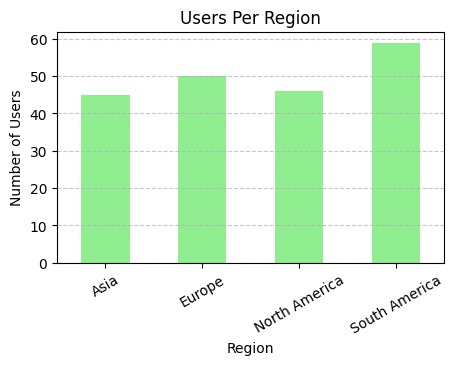

In [7]:
customers_per_region = customers.groupby('Region')['CustomerID'].nunique().reset_index()
customers_per_region.rename(columns={'CustomerID': 'TotalCustomers'}, inplace=True)

plt.figure(figsize=(5, 3))
customers_per_region.set_index('Region')['TotalCustomers'].plot(kind='bar', color='lightgreen')
plt.title('Users Per Region')
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

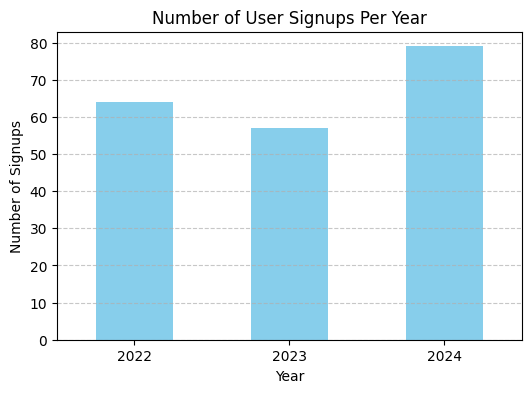

In [9]:
signups_per_year = customers['SignupDate'].dt.year.value_counts().sort_index()

plt.figure(figsize=(6, 4))
signups_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of User Signups Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight: Customer Signups have increased over the years

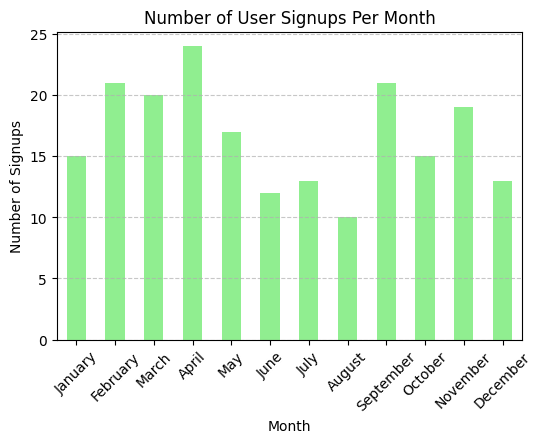

In [10]:
signups_per_month = customers['SignupDate'].dt.month.value_counts().sort_index()

plt.figure(figsize=(6, 4))
signups_per_month.index = signups_per_month.index.map(lambda x: pd.to_datetime(f'2024-{x}-01').strftime('%B'))
signups_per_month.plot(kind='bar', color='lightgreen')
plt.title('Number of User Signups Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

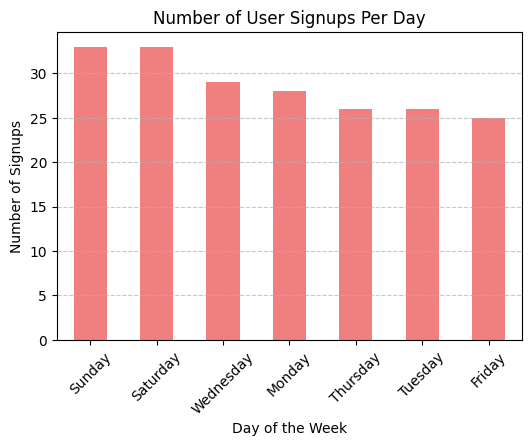

In [11]:
signups_per_day = customers['SignupDate'].dt.day_name().value_counts()

plt.figure(figsize=(6, 4))
signups_per_day.plot(kind='bar', color='lightcoral')
plt.title('Number of User Signups Per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insights: Most number of user signups are done on Saturday and Sunday. Hence, strategically scheduling posts and advertisements during weekends can maximize reach and engagement.

In [12]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [14]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [15]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,100.0,267.5517,143.219383,16.08,147.7675,292.875,397.09,497.76


In [16]:
products.describe(include='object').T

,count,unique,top,freq
ProductID,100,100,P001,1
ProductName,100,66,ActiveWear Smartwatch,4
Category,100,4,Books,26


### Number of unique ProductName is 66. Let's check if there are any duplicate rows or not.

In [17]:
prdct = products.drop(['ProductID'], axis='columns')

duplicate_rows = prdct[prdct.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['ProductName', 'Category', 'Price'])

duplicate_rows_sorted.head()

,ProductName,Category,Price


### There are no duplicate rows

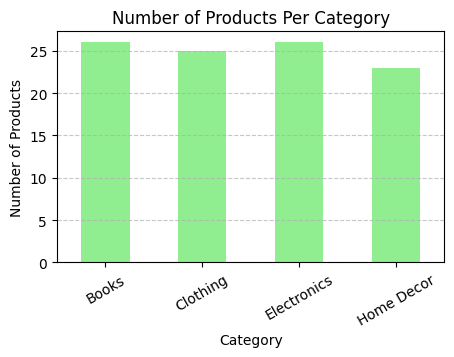

In [18]:
products_per_category = products.groupby('Category')['ProductID'].nunique().reset_index()
products_per_category.rename(columns={'ProductID': 'TotalProducts'}, inplace=True)

plt.figure(figsize=(5, 3))
products_per_category.set_index('Category')['TotalProducts'].plot(kind='bar', color='lightgreen')
plt.title('Number of Products Per Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

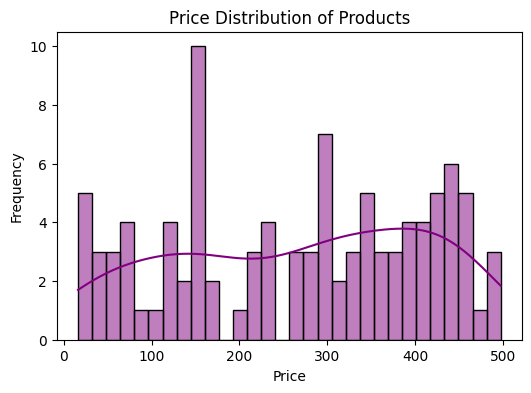

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(products['Price'], bins=30, kde=True, color='purple')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [20]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [21]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [22]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [23]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,2.53700,1.117981,1.00,2.000,3.00,4.00,4.00
TotalValue,1000.0,689.99556,493.144478,16.08,295.295,588.88,1011.66,1991.04
Price,1000.0,272.55407,140.736390,16.08,147.950,299.93,404.40,497.76


In [24]:
transactions.describe(include='object').T

,count,unique,top,freq
TransactionID,1000,1000,T00001,1
CustomerID,1000,199,C0109,11
ProductID,1000,100,P059,19
TransactionDate,1000,1000,2024-08-25 12:38:23,1


In [25]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

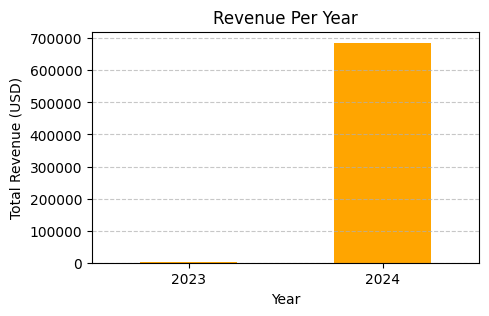

In [26]:
revenue_per_year = transactions.groupby(transactions['TransactionDate'].dt.year)['TotalValue'].sum()

plt.figure(figsize=(5, 3))
revenue_per_year.plot(kind='bar', color='orange')
plt.title('Revenue Per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

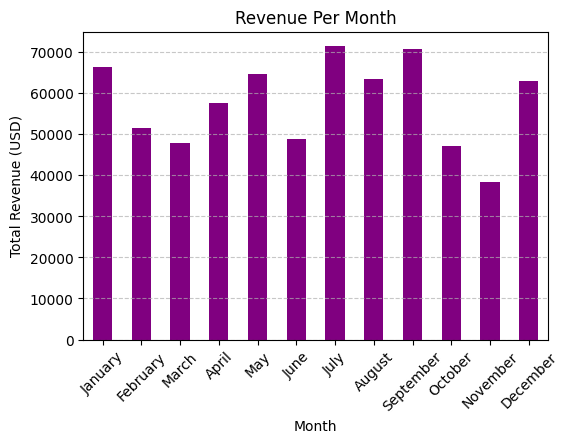

In [27]:
revenue_per_month = transactions.groupby(transactions['TransactionDate'].dt.month)['TotalValue'].sum()

plt.figure(figsize=(6, 4))
revenue_per_month.index = revenue_per_month.index.map(lambda x: pd.to_datetime(f'2024-{x}-01').strftime('%B'))
revenue_per_month.plot(kind='bar', color='purple')
plt.title('Revenue Per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insight: 3rd quarter generates more revenue.

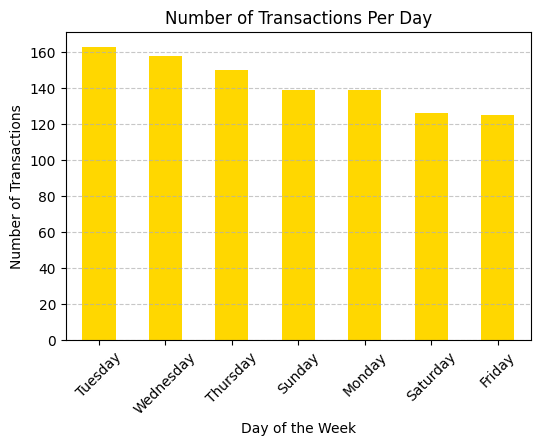

In [28]:
transactions_per_day = transactions['TransactionDate'].dt.day_name().value_counts()

plt.figure(figsize=(6, 4))
transactions_per_day.plot(kind='bar', color='gold')
plt.title('Number of Transactions Per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

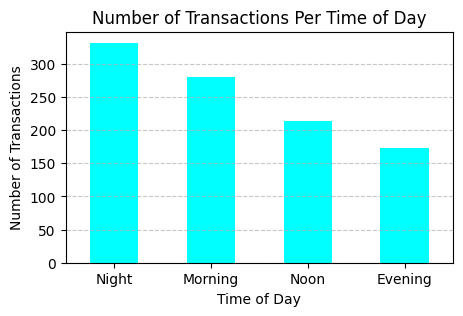

In [29]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Noon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

transactions['TimeOfDay'] = transactions['TransactionDate'].dt.hour.apply(time_of_day)

transactions_per_time = transactions['TimeOfDay'].value_counts()

plt.figure(figsize=(5, 3))
transactions_per_time.plot(kind='bar', color='cyan')
plt.title('Number of Transactions Per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insight: Most transactions are done on Tuesday and during Night time. Hence, strategically scheduling posts and advertisements during weekends can maximize reach and engagement.

In [30]:
merged_df = pd.merge(transactions, customers.drop('CustomerName', axis='columns'), on='CustomerID')
merged_df = pd.merge(merged_df, products.drop('Price', axis='columns'), on='ProductID')

In [31]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,TimeOfDay,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Noon,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Night,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Morning,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Night,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Noon,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


<Figure size 600x400 with 0 Axes>

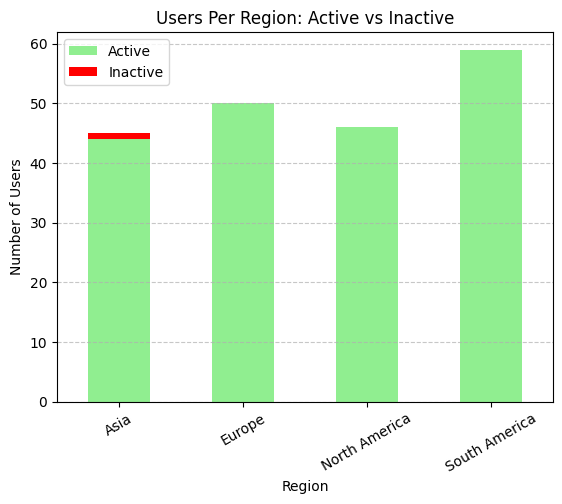

In [32]:
active_customers = merged_df.groupby('Region')['CustomerID'].nunique().reset_index()
active_customers.rename(columns={'CustomerID': 'ActiveCustomers'}, inplace=True)

final_data = pd.merge(customers_per_region, active_customers, on='Region', how='left').fillna(0)
final_data['InactiveCustomers'] = final_data['TotalCustomers'] - final_data['ActiveCustomers']

plt.figure(figsize=(6, 4))
final_data.set_index('Region')[['ActiveCustomers', 'InactiveCustomers']].plot(
    kind='bar', stacked=True, color=['lightgreen', 'red']
)
plt.title('Users Per Region: Active vs Inactive')
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.xticks(rotation=30)
plt.legend(['Active', 'Inactive'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

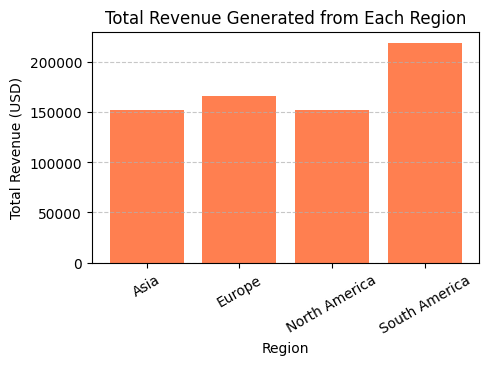

In [33]:
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(5, 3))
plt.bar(region_revenue['Region'], region_revenue['TotalValue'], color='coral')
plt.title('Total Revenue Generated from Each Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight: South America has a major share in revenue contribution by regions.

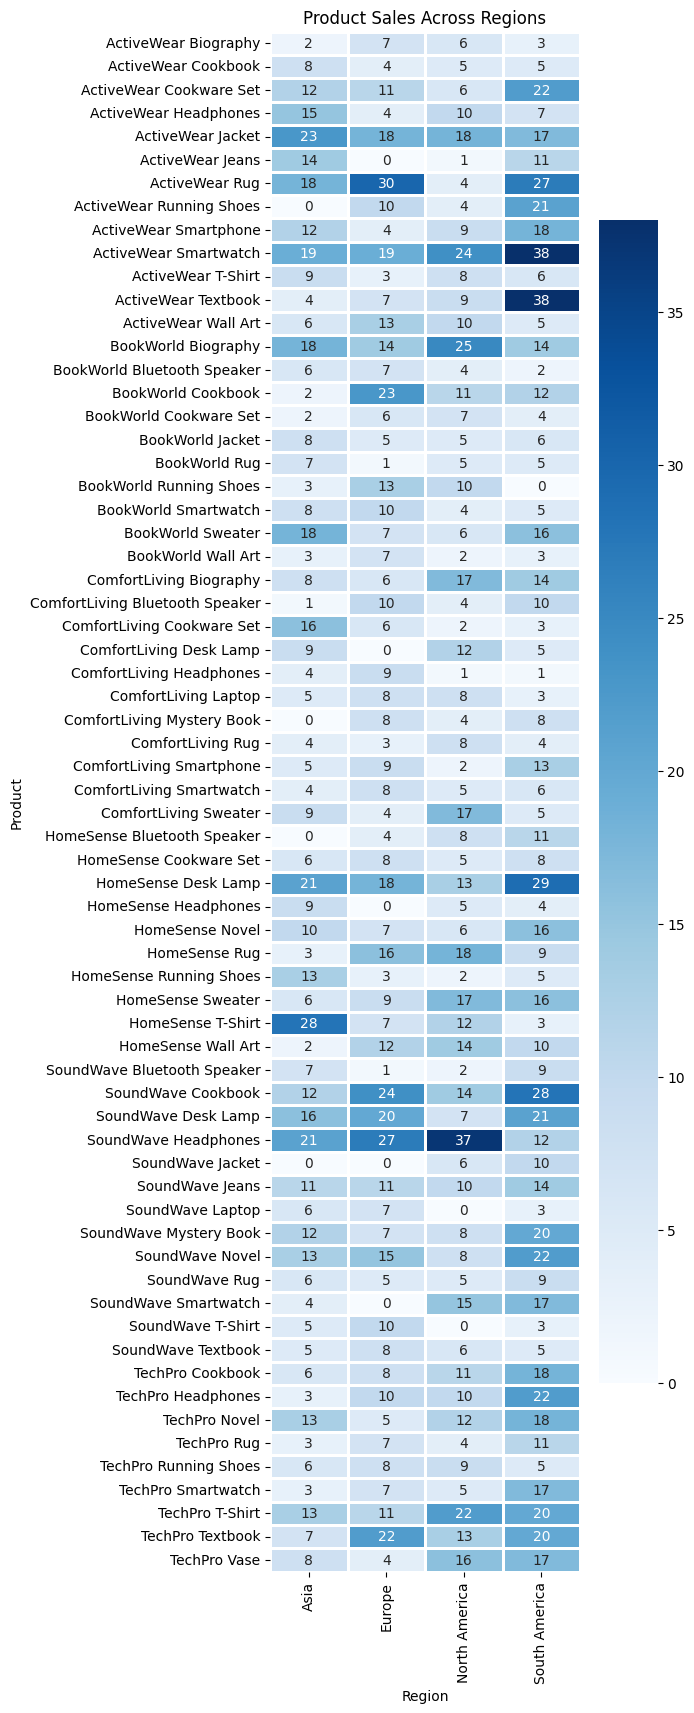

In [34]:
product_sales = merged_df.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()

pivot_table = product_sales.pivot(index='ProductName', columns='Region', values='Quantity').fillna(0)

plt.figure(figsize=(5, 20))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f', linewidths=1)
plt.title('Product Sales Across Regions')
plt.xlabel('Region')
plt.ylabel('Product')
plt.show()

## Insight: Certain products have high popularity in a specific region. ActiveWear Smartwatch and ActiveWear Textbook have high orders in South America. SoundWave Headphones have high demand in North America.

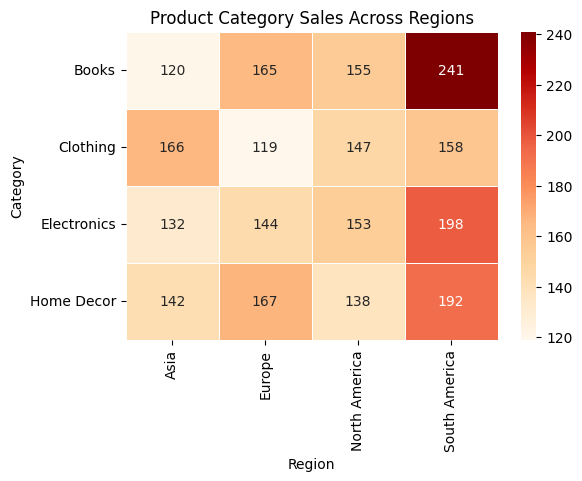

In [35]:
category_sales = merged_df.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

pivot_table_category = category_sales.pivot(index='Category', columns='Region', values='Quantity').fillna(0)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table_category, cmap='OrRd', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Product Category Sales Across Regions')
plt.xlabel('Region')
plt.ylabel('Category')
plt.show()

## Books have high demand in South America.

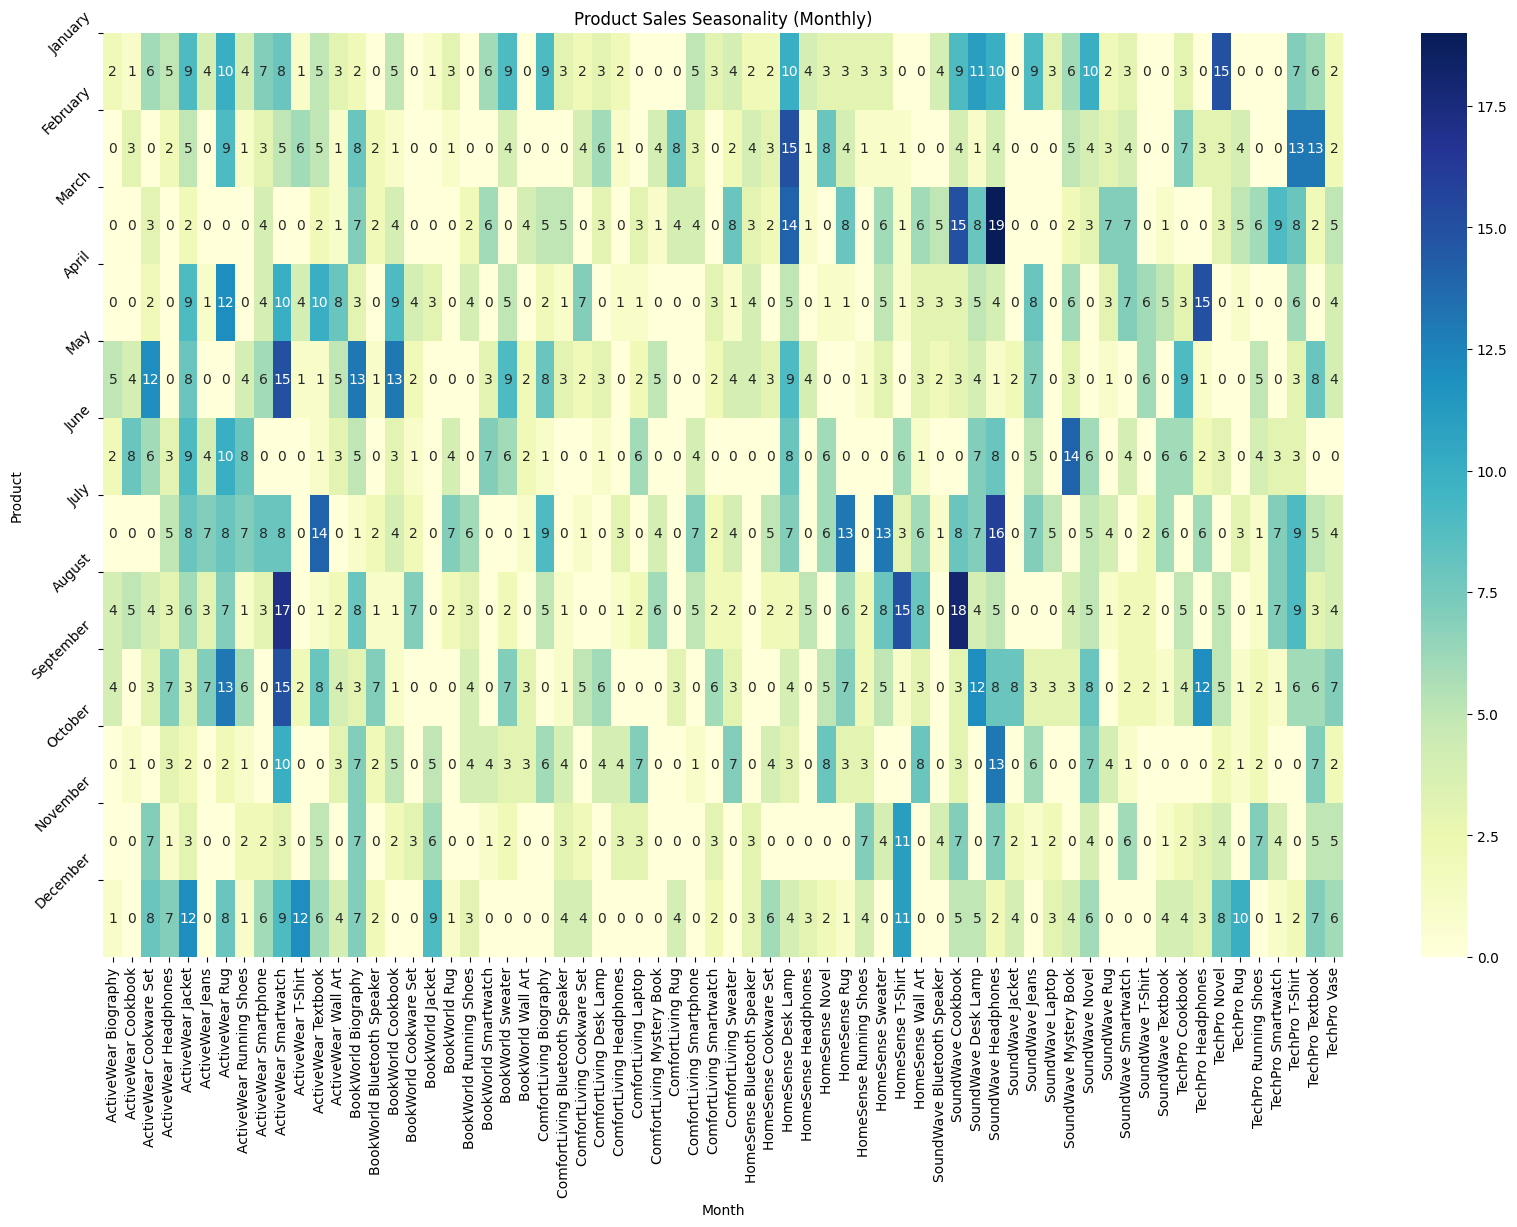

In [36]:
product_seasonality = merged_df.groupby([merged_df['TransactionDate'].dt.month, 'ProductName'])['Quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(20, 12))
sns.heatmap(product_seasonality, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Product Sales Seasonality (Monthly)')
plt.xlabel('Month')
plt.ylabel('Product')
plt.yticks(ticks=range(12), labels=pd.date_range('2024-01-01', '2024-12-31', freq='MS').strftime('%B'), rotation=45)
plt.show()

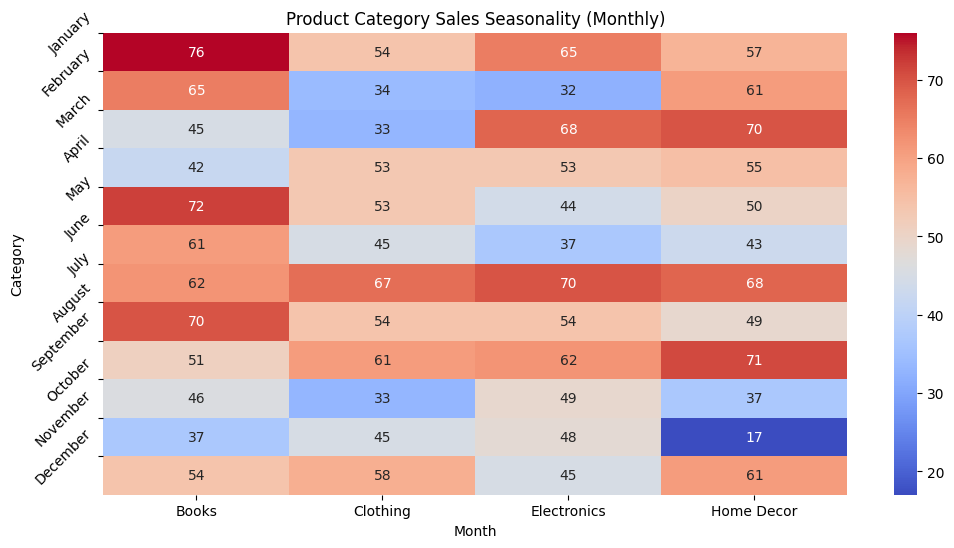

In [37]:
category_seasonality = merged_df.groupby([merged_df['TransactionDate'].dt.month, 'Category'])['Quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(category_seasonality, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Product Category Sales Seasonality (Monthly)')
plt.xlabel('Month')
plt.ylabel('Category')
plt.yticks(ticks=range(12), labels=pd.date_range('2024-01-01', '2024-12-31', freq='MS').strftime('%B'), rotation=45)
plt.show()

## Insight: Some product category sales are based on seasons. For example, Clothing and Books are more in demand during 3rd quarter. 

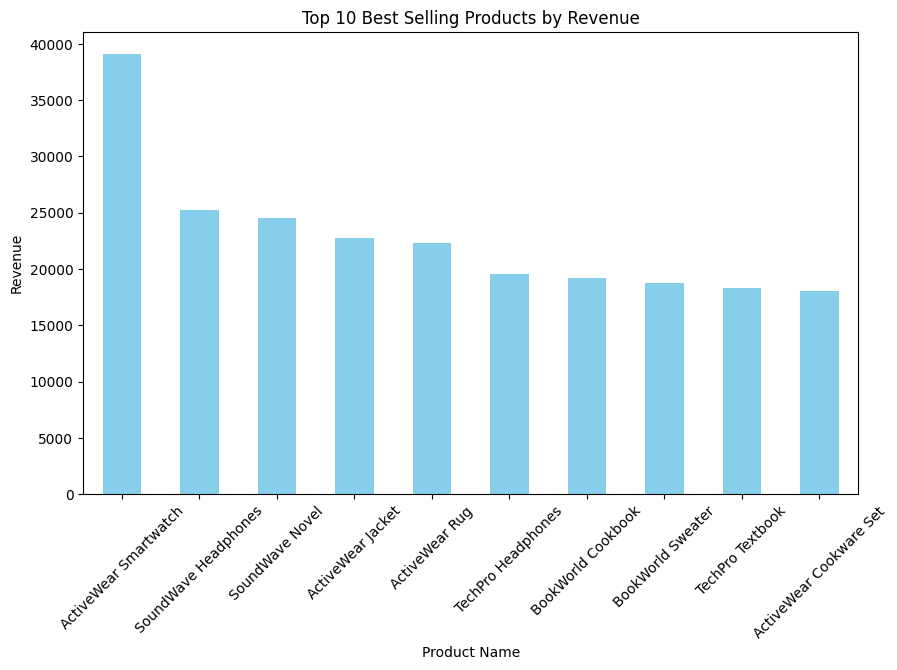

In [38]:
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Best Selling Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## Insight: ActiveWear smartwatch is the most popular product on the ecommerce platform.

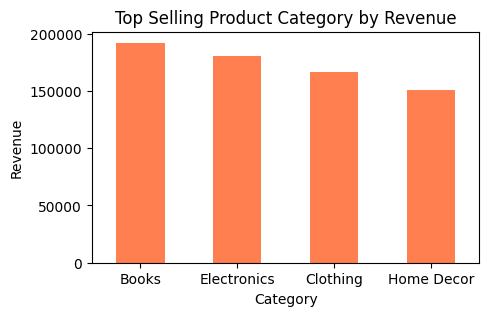

In [39]:
top_categories = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', figsize=(5, 3), color='coral')
plt.title('Top Selling Product Category by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

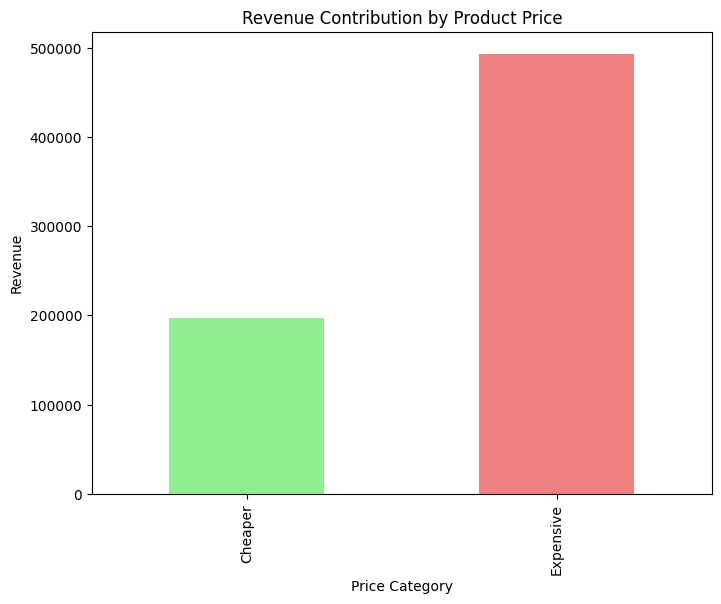

In [40]:
merged_df['PriceCategory'] = pd.qcut(merged_df['Price'], q=2, labels=['Cheaper', 'Expensive'])
price_revenue = merged_df.groupby('PriceCategory')['TotalValue'].sum()
price_revenue.plot(kind='bar', figsize=(8, 6), color=['lightgreen', 'lightcoral'])
plt.title('Revenue Contribution by Product Price')
plt.xlabel('Price Category')
plt.ylabel('Revenue')
plt.show()

## Insight: Ecommerce Business is earning more through expensive products.

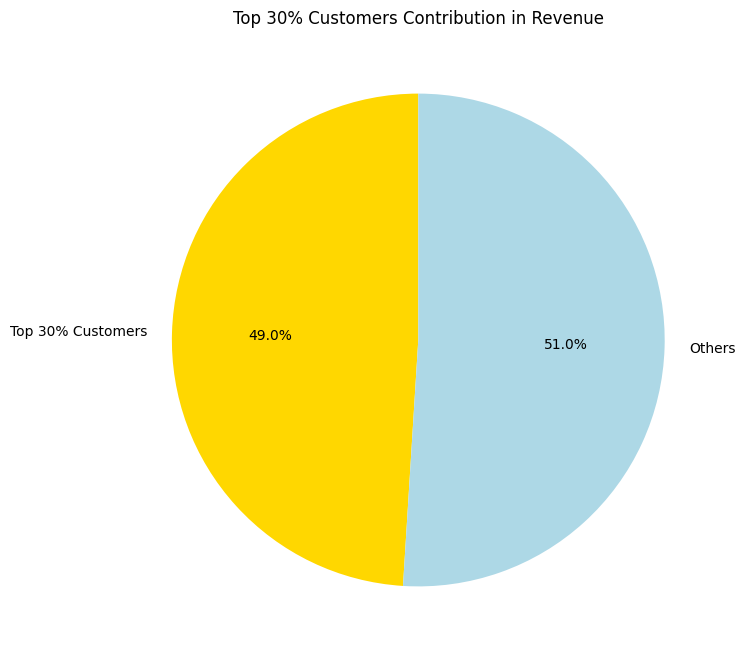

In [41]:
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_30_percent_count = int(len(top_customers) * 0.3)
top_30_percent_revenue = top_customers.head(top_30_percent_count).sum()
total_revenue = top_customers.sum()
contribution = (top_30_percent_revenue / total_revenue) * 100
labels = ['Top 30% Customers', 'Others']
sizes = [contribution, 100 - contribution]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['gold', 'lightblue'], startangle=90)
plt.title('Top 30% Customers Contribution in Revenue')
plt.show()

## Insight: Almost 50% of revenue is generated by Top 30% customers.